In [1]:
%conda info


     active environment : base
    active env location : /opt/conda
            shell level : 1
       user config file : /opt/ml/.condarc
 populated config files : 
          conda version : 4.9.2
    conda-build version : 3.18.11
         python version : 3.7.10.final.0
       virtual packages : __cuda=10.1=0
                          __glibc=2.27=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /opt/conda  (writable)
           channel URLs : https://repo.anaconda.com/pkgs/main/linux-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/linux-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /opt/conda/pkgs
                          /opt/ml/.conda/pkgs
       envs directories : /opt/conda/envs
                          /opt/ml/.conda/envs
               platform : linux-64
             user-agent : co

# Model

In [2]:
import os
from pathlib import Path

BASE_DIR = Path('.').resolve().parent
BASE_DIR

PosixPath('/opt/ml')

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader
import torchvision
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [5]:
from tqdm import tqdm

In [6]:
import random
random.seed(123)

torch.manual_seed(123)
torch.cuda.manual_seed(123)
np.random.seed(123)

In [7]:
import warnings 
warnings.filterwarnings('ignore')

## Load Dataset, Dataloader

In [8]:
df_path = BASE_DIR / 'output' / 'all_df.pkl'
df = pd.read_pickle(df_path)

In [9]:
class MaskDataset(Dataset):
    def __init__(self, pkl_path, transform=None, target_transform=None):
        self.df = pd.read_pickle(pkl_path)
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        row = self.df.iloc[idx, :]
        img_name = row['path'] + row['filename']
        img_path = row['filepath']
        img_np = mpimg.imread(img_path) # H, W, C
        
        label_gender = row['gender_code'] # TODO: 미리 category 숫자로 바꿔놓아야 한다. 
        label_age = row['age']
        label_mask = row['mask_code']
        label_cat = row['cat_code']
        
        if self.transform:
            image = self.transform(image=img_np)
        if self.target_transform:
            pass
        
        sample = {'image': img_np, 'gender': label_gender, 'age': label_age, 'mask': label_mask, 'label': label_cat}
#         sample = {'image': img_np, 'label': label_cat}
        
        return sample

In [10]:
mask_dataset = MaskDataset(pkl_path=df_path,)
len(mask_dataset)

18900

In [11]:
transform = A.Compose([
    A.RandomCrop(width=200, height=300),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Normalize(),
    ToTensorV2(), 
])

transformed_dataset = MaskDataset(pkl_path=df_path, transform=transform)

In [12]:
dataloader = DataLoader(transformed_dataset, batch_size=4, shuffle=True, num_workers=10)
dataloader

## Mission 1

해당 모델 구현, 문제 정의에 맞게 classifier도 설계

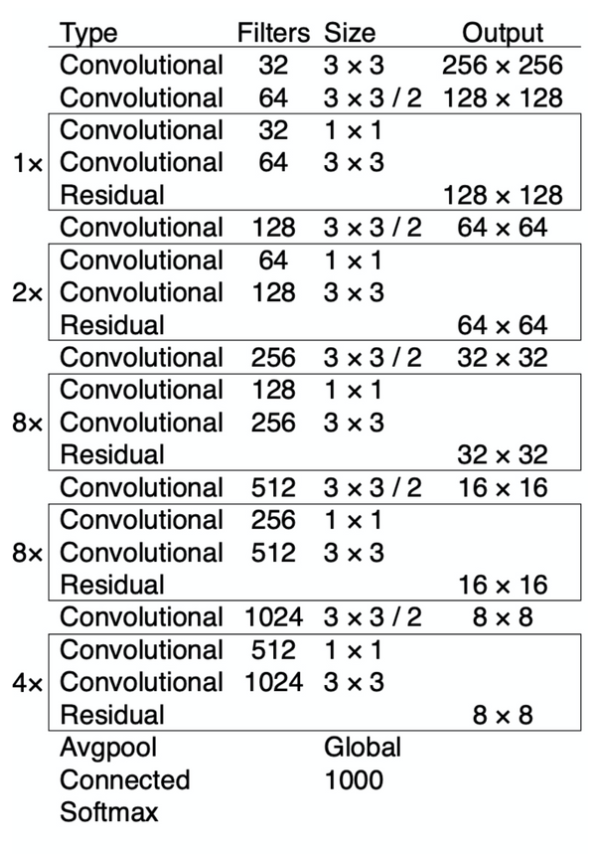




아래만큼 짜다 말음. 

구조 헷갈린다. 
```python
class ConvConvRes:
    def __init__(self, 
                 input_dim: int, hidden_dim: int, output_dim: int, 
                 filters: int, filter_size_t: tuple, res_size: int):
        
        f_size1, f_size2 = filter_size_t
        assert f_size1 % 2 == 1
        assert f_size2 % 2 == 1
        
        self.conv1 = nn.Conv2d(input_dim, hidden_dim, kernel_size=f_size1, padding=f_size1 // 2)
        self.conv2 = nn.Conv2d(hidden_dim, output_dim, kernel_size=f_size2, padding=f_size2 // 2)
        
    

class Mission1(nn.Module):
    def __init__(self, in_channels, num_classes=18):
        super().__init__()
        
        self.relu = nn.Relu(inplace=True)
        
        self.conv1 = nn.Conv2d(in_channels, out_channels=32, kernel_size=3, padding=3//2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=3//2) #??? 
        self.convconv
```        

답안을 봤는데 꽤 어렵다. 

일단 layer를 하나하나 짜지 않고 oop스럽게 class로 block을 정의해주는 것은 맞긴했다. 

하지만 residual block은 forward를 넣은 하나의 `nn.Module`을 상속받은 클래스로 짜줘야 하며, 여러 layer는 `nn.Sequential`로 묶어주는 것이 방법이었다. 

## Mission2 

정답코드 따라하였다. 

In [13]:
[x for x in dir(torchvision.models) if not x.startswith('_')]

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'Inception3',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn',
 'video',
 'wide_resnet101_2',
 'wide_resnet50_2']

In [14]:
# model = torchvision.models.resnet18(pretrained=True, )
model = torchvision.models.vgg19_bn(pretrained=True, )

In [15]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [27]:
num_classes = 18

# model.fc = nn.Linear(512, num_classes, bias=True)
model.classifier = nn.Sequential(
    nn.Linear(512 * 7 * 7, 4096),
    nn.ReLU(True),
    nn.Dropout(),
    nn.Linear(4096, 4096),
    nn.ReLU(True),
    nn.Dropout(),
    nn.Linear(4096, num_classes),
)

model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [28]:
model.features.requires_grad_(False)

for param, weight in model.named_parameters():
    print(f'{param:20} required gradient? -> {weight.requires_grad}')

features.0.weight    required gradient? -> False
features.0.bias      required gradient? -> False
features.1.weight    required gradient? -> False
features.1.bias      required gradient? -> False
features.3.weight    required gradient? -> False
features.3.bias      required gradient? -> False
features.4.weight    required gradient? -> False
features.4.bias      required gradient? -> False
features.7.weight    required gradient? -> False
features.7.bias      required gradient? -> False
features.8.weight    required gradient? -> False
features.8.bias      required gradient? -> False
features.10.weight   required gradient? -> False
features.10.bias     required gradient? -> False
features.11.weight   required gradient? -> False
features.11.bias     required gradient? -> False
features.14.weight   required gradient? -> False
features.14.bias     required gradient? -> False
features.15.weight   required gradient? -> False
features.15.bias     required gradient? -> False
features.17.weight  

In [29]:
import torch.nn.init as init

def initialize_weights(model):
    """
    Initialize all weights using xavier uniform. 
    For more weight initialization methods, check https://pytorch.org/docs/stable/nn.init.html
    """
    for m in model.modules():
        if isinstance(m, nn.Conv2d):
            init.xavier_uniform_(m.weight.data)
            if m.bias is not None:
                m.bias.data.zero_()
        elif isinstance(m, nn.BatchNorm2d):
            m.weight.data.fill_(1)
            m.bias.data.zero_()
        elif isinstance(m, nn.Linear):
            m.weight.data.normal_(0, 0.01)
            m.bias.data.zero_()

In [19]:
model.train()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
EPOCH = 1

age에 focal loss와 label smoothing loss를 모두 적용하는 방법을 써볼 수 있다. 

각 age를 class로 볼수도 있고, regression처럼 값으로 볼 수도 있는데, 일단 신경망으로 regression을 푼다는 것의 의미는?

--> 단순히 MSEloss를 써주기만 하면 되는 것? 


일단 

각 age를 class로 잡되 나이는 연속적으로 변하므로 label smoothing을 각 정답레이블의 정답 부분을 mean으로 하는 Normal Dist로 준다. 

class imbalance를 해결하기 위해 맞춘 클래스 = ...?? 

-> focal loss의 개념... ???